<a href="https://colab.research.google.com/github/coderhetal/NLP/blob/main/CBOW.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing libraries

In [66]:
import torch
import numpy as np
import torch.nn as nn
import matplotlib.pyplot as plt
import torch.nn.functional as Fun
!pip install spacy

In [67]:
text = '''Nowadays, Machine learning (ML) is an exciting major of research in computer science
and engineering. It is considered a subset of Artificial Intelligence (AI) because it enables the
extraction of meaningful patterns from samples, which is a capability of human intelligence. The demand
of having a computer that performs repetitive and well-defined tasks is clear: computers will perform a given
task consistently and tirelessly, but these tasks would be difficult to accomplish for human. In recent years,
 machines have showed the ability to learn and even master tasks that were thought to be extremely complicated
  for machines, showing that machine learning algorithms are potentially useful elements of detection and decision
   support systems. Another exciting point is the finding that in some situations, computers seem to be able to
    observe patterns that are beyond human perception. This discovery has led to substantial and increased interest
     in the major of machine learning in various areas. At a high level, machine learning is the process of
      teaching a computer system how to make accurate predictions when fed data. Those predictions could be
       answering whether a piece of fruit in a photo is a banana or an apple, spotting people crossing the
        road in front of a self-driving car, whether the use of the word book in a sentence relates to a
         paperback or a hotel reservation, whether an email is spam, or recognizing speech accurately enough
          to generate captions for a video. The key difference between traditional computer software and machine
           learning approach is that a human developer has not written codes that instructs the system how to tell
           the difference between the banana and the apple. Instead, a machine-learning model has been taught how
           to reliably discriminate between the fruits by training on a large amount of data, in this instance likely
            a massive number of images labelled as containing a banana or an apple.'''.split()


In [68]:
print(len(text))

313


In [69]:

vocab = set(text)
print(len(vocab))
#set contains unique words present in the text
vocab_size = len(vocab)

word_to_index = {w: index for (index, w) in enumerate(vocab)}
#creates a dictionary called word_to_index ,word key and index is the value
index_to_word = {index: w for (index, w) in enumerate(vocab)}

print(word_to_index)
print(index_to_word)

188
{'led': 0, 'book': 1, 'fruit': 2, 'potentially': 3, 'a': 4, 'science': 5, 'situations,': 6, 'number': 7, 'spam,': 8, 'considered': 9, 'Another': 10, 'email': 11, 'images': 12, 'could': 13, 'road': 14, 'developer': 15, 'This': 16, 'Intelligence': 17, 'will': 18, 'make': 19, 'self-driving': 20, 'taught': 21, 'samples,': 22, 'are': 23, 'accomplish': 24, 'meaningful': 25, 'ability': 26, 'capability': 27, 'computers': 28, 'observe': 29, 'use': 30, '(ML)': 31, 'even': 32, 'demand': 33, 'The': 34, 'showing': 35, 'well-defined': 36, 'high': 37, 'crossing': 38, 'difference': 39, 'labelled': 40, 'substantial': 41, 'seem': 42, 'sentence': 43, 'In': 44, 'machines,': 45, 'able': 46, 'tirelessly,': 47, 'engineering.': 48, 'perform': 49, 'enables': 50, 'discriminate': 51, 'an': 52, 'teaching': 53, 'human': 54, 'or': 55, 'extremely': 56, 'that': 57, 'task': 58, 'data,': 59, 'beyond': 60, 'paperback': 61, 'video.': 62, 'massive': 63, 'spotting': 64, 'codes': 65, 'answering': 66, 'thought': 67, 'of'

In [70]:
data = []
labels = []
n = 0
#window size selected is 5 : 2 elements before and 2 after
for i in range(2, len(text) - 2):
  #iterates over each word except the first 2 and last 2
  n +=1
  context_vec = [word_to_index[text[i - 2]], word_to_index[text[i - 1]],
                word_to_index[text[i + 1]], word_to_index[text[i + 2]]]
  #context_vec is created as a list containing the word indices of the surrounding context words
  context_vec = torch.tensor(context_vec, dtype=torch.long)
  context = Fun.one_hot(context_vec, num_classes = vocab_size)
  #here all the context vectors are one hot encoded according to the vocab size
  # 4 x vocab_size-->context

  context = torch.sum(context, dim = 0, keepdim = True)
   # sum along the dim =0
   # 1 x vocab_size
  target = torch.tensor(word_to_index[text[i]])
  # target word converted to index and index to tensor
  labels.append(target)
  #target tensor appended to the list
  target = Fun.one_hot(target, num_classes = vocab_size)
  #target tensor alos one hot encoded as per the vocab _size
  data.append((context, target))
print(n)#313-4

309


In [71]:
class CBOW(nn.Module):
    def __init__(self, vocab_size, embedding_dim):
      super(CBOW, self).__init__()
      self.L1 = nn.Linear(vocab_size, embedding_dim, bias = False)
      self.L3 = nn.Linear(embedding_dim, vocab_size)

    def forward(self, x):
      out = Fun.relu(self.L1(x))
      out = Fun.softmax(self.L3(out), dim = 1)
      return out

In [72]:
model = CBOW(vocab_size, 32)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

In [73]:
from tqdm import tqdm

In [74]:
loss_func = []
accuracy = []
c=0
for i in range(0,200):
  loss = 0
  acc = 0
  t=0
  for k, (context, target) in enumerate(tqdm(data)):
    c+=1
    t+=1
    output = model(context.float())
    loss += criterion(output.squeeze(0), target.float())
    _, predicted = torch.max(output.data , 1)
    if(predicted == labels[k]):
      acc += 1
  loss_func.append(float(loss))
  accuracy.append(acc/n*100)

  if (i % 10 == 0):
            print('Epoch {} , Loss: {:.4f}, Accuracy: {:.2f}%'
                  .format(i+1, loss,
                         (acc/n* 100)))

  optimizer.zero_grad()
  loss.backward()
  optimizer.step()
print(f'No of iterations  {c}')
print(f'total words   {t}')


100%|██████████| 309/309 [00:00<00:00, 3946.29it/s]

Epoch 1 , Loss: 1618.0693, Accuracy: 0.00%



100%|██████████| 309/309 [00:00<00:00, 5414.20it/s]


Epoch 11 , Loss: 1616.2080, Accuracy: 16.18%


100%|██████████| 309/309 [00:00<00:00, 5671.82it/s]


Epoch 21 , Loss: 1602.5112, Accuracy: 16.18%


100%|██████████| 309/309 [00:00<00:00, 5506.65it/s]


Epoch 31 , Loss: 1570.6046, Accuracy: 24.60%


100%|██████████| 309/309 [00:00<00:00, 1043.11it/s]


Epoch 41 , Loss: 1522.6283, Accuracy: 38.51%


100%|██████████| 309/309 [00:00<00:00, 1890.49it/s]


Epoch 51 , Loss: 1488.5859, Accuracy: 46.28%


100%|██████████| 309/309 [00:00<00:00, 2755.85it/s]


Epoch 61 , Loss: 1467.7629, Accuracy: 51.13%


100%|██████████| 309/309 [00:00<00:00, 1113.48it/s]


Epoch 71 , Loss: 1454.8815, Accuracy: 55.02%


100%|██████████| 309/309 [00:00<00:00, 1840.34it/s]


Epoch 81 , Loss: 1449.2939, Accuracy: 56.31%


100%|██████████| 309/309 [00:00<00:00, 1865.94it/s]


Epoch 91 , Loss: 1446.4525, Accuracy: 56.63%


100%|██████████| 309/309 [00:00<00:00, 2048.48it/s]


Epoch 101 , Loss: 1445.5067, Accuracy: 56.96%


100%|██████████| 309/309 [00:00<00:00, 1328.74it/s]


Epoch 111 , Loss: 1443.9940, Accuracy: 57.28%


100%|██████████| 309/309 [00:00<00:00, 5671.75it/s]


Epoch 121 , Loss: 1443.8464, Accuracy: 57.28%


100%|██████████| 309/309 [00:00<00:00, 5311.79it/s]


Epoch 131 , Loss: 1443.7753, Accuracy: 57.28%


100%|██████████| 309/309 [00:00<00:00, 5213.82it/s]


Epoch 141 , Loss: 1443.4167, Accuracy: 57.61%


100%|██████████| 309/309 [00:00<00:00, 4523.57it/s]


Epoch 151 , Loss: 1442.8206, Accuracy: 57.61%


100%|██████████| 309/309 [00:00<00:00, 5647.01it/s]


Epoch 161 , Loss: 1442.7483, Accuracy: 57.61%


100%|██████████| 309/309 [00:00<00:00, 5465.64it/s]


Epoch 171 , Loss: 1442.7018, Accuracy: 57.61%


100%|██████████| 309/309 [00:00<00:00, 5544.98it/s]


Epoch 181 , Loss: 1442.3943, Accuracy: 57.93%


100%|██████████| 309/309 [00:00<00:00, 5194.51it/s]


Epoch 191 , Loss: 1440.4749, Accuracy: 58.58%


100%|██████████| 309/309 [00:00<00:00, 4685.97it/s]


No of iterations  61800
total words   309


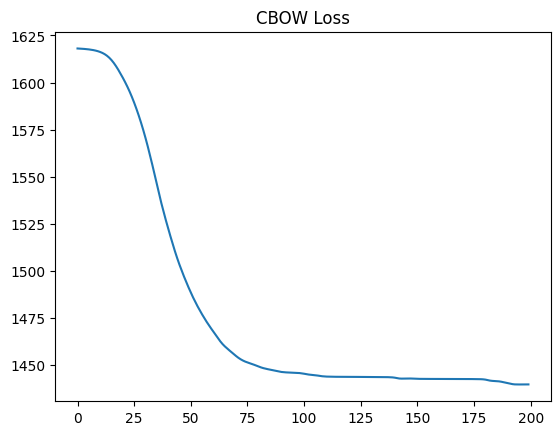

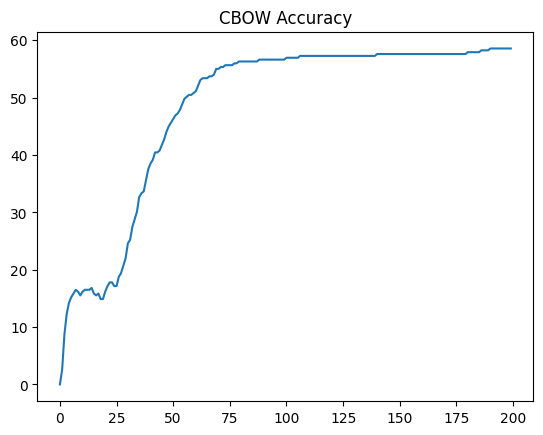

In [75]:
plt.plot(loss_func)
plt.title("CBOW Loss")
plt.show()
plt.plot(accuracy)
plt.title("CBOW Accuracy")
plt.show()

# Predicting a word for the 4 words as context


In [76]:
txt = input('Enter a text : ')
txt1 = txt.split()
#split the text
vec = [word_to_index[txt1[0]], word_to_index[txt1[1]], word_to_index[txt1[2]], word_to_index[txt1[3]]]
#saves the index of words in a list
vec = torch.tensor(vec, dtype = torch.long)
#convert them to tensors

cntxt = Fun.one_hot(vec, num_classes = vocab_size)
#covert them to one hot vectors which is equal to vocal size vector for each word 4 x vocab size
cntxt = torch.sum(cntxt, dim = 0, keepdim = True)
#sums along dim 0 i.e now the dimension will be 1 x vocab size
output = model(cntxt.float())
#sends it to the model
#we will get the output as a learned context vector
_, predicted = torch.max(output.data , 1)
#finds the max value from that vector
#predicted corresponds to the index of the vector in the given vector itsef

print('Predicted : ', index_to_word[int(predicted)])
#converts the index to the corresponding word fron the vocabulary

Enter a text : in machine learning the
Predicted :  of


In [77]:
for name, param in model.named_parameters():
  if 'L1.weight' in name:
    embed = param.detach().numpy()
    embed = embed.T
    print('Embedding shape : ', embed.shape)
    print(embed)

Embedding shape :  (188, 32)
[[-0.27406883  0.7722961   0.17322174 ...  1.0324343  -0.13906193
  -0.34085405]
 [-0.23874001  0.43584624  0.26590315 ...  0.6547057   0.05250912
   0.11085521]
 [ 0.44110918  0.37936404  0.74168116 ... -0.06702202  0.46638077
   0.53600216]
 ...
 [ 0.08862593  0.3252848   0.23346733 ...  0.6613278   0.2824074
  -0.0597351 ]
 [-0.45595112 -0.69640255 -0.6942933  ...  0.38793042  0.04088897
   0.38029623]
 [ 0.4281791   0.43370268 -0.6527519  ... -0.19319774 -0.16187747
  -0.32983845]]


In [79]:
w1 = input('Enter word-1 : ')
w2 = input('Enter word-2 : ')
w3 = input('Enter word-3 : ')
cos_dist1 = np.dot(embed[word_to_index[w1]], embed[word_to_index[w2]])
cos_dist2 = np.dot(embed[word_to_index[w2]], embed[word_to_index[w3]])
cos_dist3 = np.dot(embed[word_to_index[w1]], embed[word_to_index[w3]])
print('The cosine distance between word-1 and word-2 is : ', cos_dist1)
print('The cosine distance between word-2 and word-3 is : ', cos_dist2)
print('The cosine distance between word-1 and word-3 is : ', cos_dist3)

Enter word-1 : the
Enter word-2 : machine
Enter word-3 : is
The cosine distance between word-1 and word-2 is :  5.4331975
The cosine distance between word-2 and word-3 is :  3.4979556
The cosine distance between word-1 and word-3 is :  1.4889692


In [80]:
#the function returns the transformed embeddings,
#which are the result of applying PCA to the original
#embedding matrix. The returned embeddings will have a
#reduced dimensionality of two,
#capturing the most significant variation in the original embeddings.


def PCA(embedding):
  #Principal component analysis
  corr = np.corrcoef(embedding)
  #The correlation matrix measures the linear relationship
  # between pairs of variables (embeddings) in the matrix.
  values,vectors = np.linalg.eig(corr)
  #The eigenvalues represent the variance explained by each eigenvector,
  #while the eigenvectors represent the principal components.
  args = (-values).argsort()
  # This line sorts the eigenvalues (values) in descending
  #order and stores the indices of the sorted values in the args variable.
  # The negative sign is used to sort in descending order.
  values = vectors[args]
  vectors = vectors[:, args]
  new_vectors=vectors[:,:2]
  return np.multiply(embedding[:,:2], new_vectors)

(188, 2)


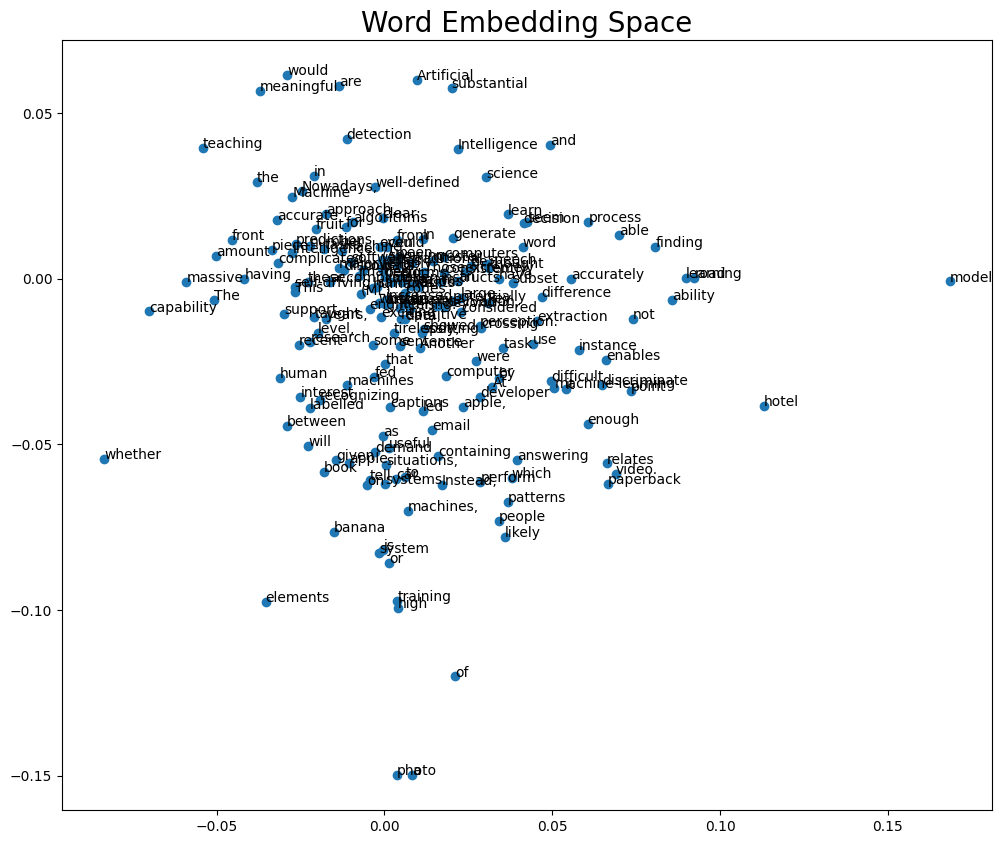

In [81]:
#applies PCA to the word embeddings, transforms
# them to two dimensions, and visualizes the transformed
# embeddings in a scatter plot with word annotations.
pca = PCA(embed)
print(pca.shape)
plt.figure(figsize=(12,10))
plt.scatter(pca[:,0], pca[:,1])
plt.title("Word Embedding Space",size=20)
for i, word in enumerate(vocab):
  plt.annotate(word,xy=(pca[i,0],pca[i,1]))